Welcome to the **Using Variable Substitution** lab. Now that you have implemented the steps in the previous lab, it is time to optimize them by making them more generic so that the same steps can satisfy multiple scenario statements. You can do this by parameterized strings that Behave uses for matching, using variable substitution.

# Learning Objectives

After completing this lab, you will be able to:
* Eliminate similar steps using variable substitution
* Pass dynamic data into your step definitions

# Set Up the Lab Environment

## Clone the Code Repo

Now get the code that you need to test. 

To do this, use the `git clone` command to clone the git repository:
```
git clone https://github.com/ibm-developer-skills-network/duwjx-tdd_bdd_PracticeCode.git
```

## Change into the Repo Folder

Finally, you should switch to the directory that contains the lab files.
```
cd /home/project/duwjx-tdd_bdd_PracticeCode
```

## Install Lab Dependencies

Once you have cloned the repository, you need to install some prerequisite software into the development environment.
```
bash ./bin/setup.sh
```

## Change into the Lab Folder

Next, you should switch to the directory that contains the lab files.
```
cd /home/project/duwjx-tdd_bdd_PracticeCode/labs/13_variable_substitution
```

## Install Python Dependencies

The final preparation step is to use `pip` to install the Python packages needed for the lab:
```
pip install -r requirements.txt
```
You are now ready to start the lab.

# Navigate to the Code

In the IDE, navigate to the `duwjx-tdd_bdd_PracticeCode/labs/13_variable_substitution` folder. 

This folder contains the source code that you will use for this lab.

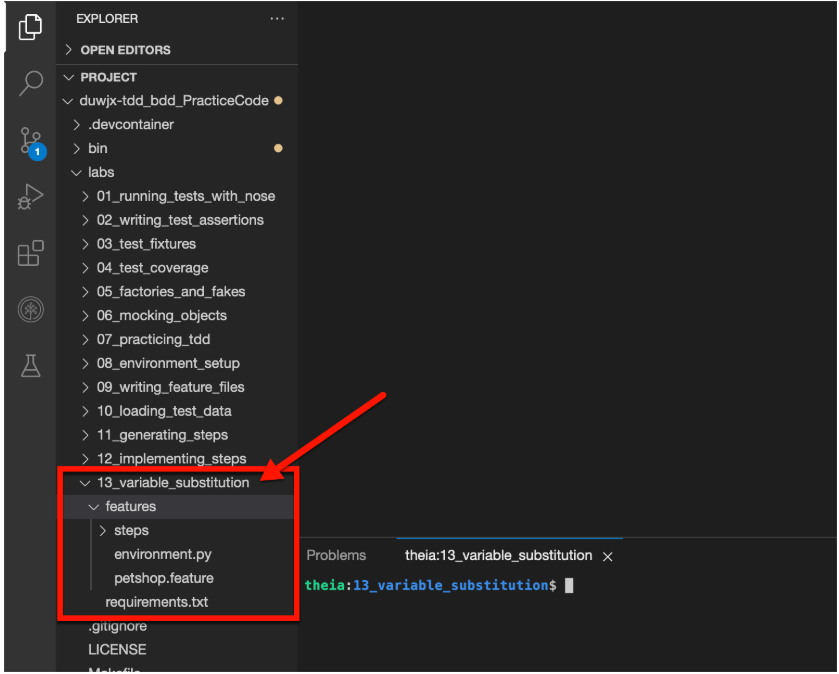

# The User Interface

Below is the User Interface that you will be testing with Selenium and Behave in this lab:

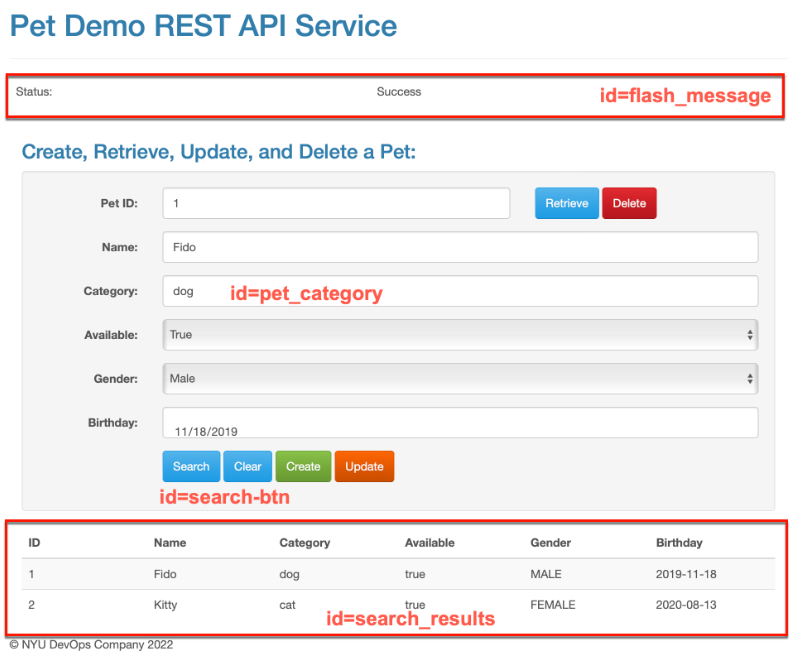

The image has been annotated to show the following:

* The website you are testing uses a consistent naming convention for each HTML element’s `‘id’` attribute that needs to be manipulated. They all start with the prefix `pet_` followed by the lowercase name of the element. For example, the Category element has an `id` of `pet_category`.

* The website under test uses the following naming convention for creating the `id=` attribute on buttons. It uses the lowercase text from the button, with the suffix `-btn`. For example, the **Search** button has an `id` of `search-btn`, and the **Create** button has an `id` of `create-btn`, and so forth.

* There are two special id's that are `flash_message` and `search_results`. The `flash_message` area holds any messages coming back from the actions you perform. The `search_results` area contains a table of data that is returned from pressing the **Search** button.


# Selenium Changes

> **Important Notice**
>
> From the time that the video lectures were created until now, the Python Selenium package has seen many new releases and a major upgrade from `3.141.0` to `4.19.0`. During this time, the API taught in the video lecture `find_element_by_id(element_id)` has been deprecated and now removed. The equivalent API is now: `find_element(By.ID, element_id)`. These lab instructions and sample code have been changed to the new syntax.

This is the code change that you need to utilize in this lab which differs from the video:

## Old Code

```
context.driver.find_element_by_id(element_id)
```

## New Code

You must import the Selenium `By` class like this:
```
from selenium.webdriver.common.by import By
```
Then whenever you need to find an element by id, you need to call `find_element()` passing on `By.ID` as the first paramater like this:
```
context.driver.find_element(By.ID, element_id)
```
The hints and suggestion in this lab will remind you of the new code syntax. We just want you to be aware that the code in the lab no longer matches the code presented in the video, but the concepts are `100%` the same, it was just a syntax change.

# Start: Run Behave

In the last lab, you implemented steps for the `petshop.feature` file. 

In this lab, you will be optimizing these steps using variable substitution.

Let's start by running the `behave` command and ensure that all the scenario steps pass.

## Your Task

Use `Terminal -> New Terminal`, to open a bash shell and run the `behave` command:

The output should look like this:

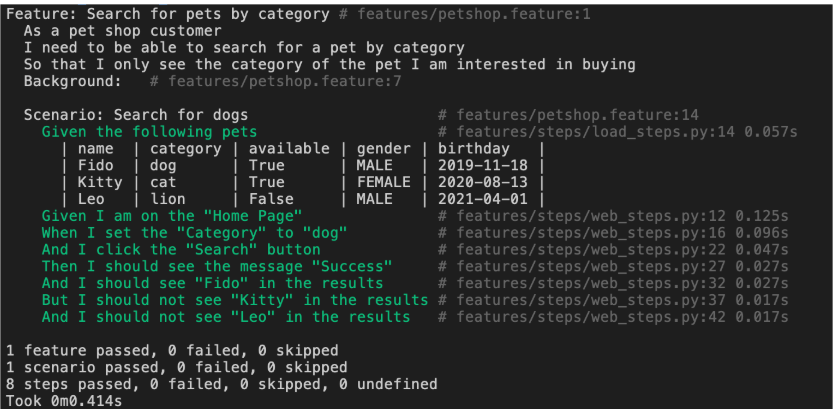

As you can see, all of the steps are passing. You are now ready to modify these, knowing that if you make a mistake or change the behavior, the tests will fail, alerting you to the problem.

# Step 1: Parameterize the element name

Open the `features/steps/web_steps.py` file in the IDE editor. 

You will work in this file for the remainder of the lab.

The first task is to parameterize the step for `@when('I set the "Category" to "dog"')`. 

The code for this step is as follows:
```
@when('I set the "Category" to "dog"')
def step_impl(context):
    element = context.driver.find_element(By.ID, 'pet_category')
    element.clear()
    element.send_keys('dog')
```

This step has two opportunities for variable substitution. It references the name of a widget on the UI, and specifies the data that the widget (in this case, a `text` field) should contain. There are multiple fields in the UI and an endless amount of data they can contain. These are two good candidates for using variable substitution.

Let's start with eliminating the hard-coded `Category` string.

## Background

Here is some important background information that will help you implement the solution:

* You can add a variable name between curly braces `{}` as a substitution for the text that appears in the scenario statement and then pass that variable into your step as a parameter. For example: **“Hello {name}”** will create a variable called `name` that you can pass into a step as a parameter like this: `def step_impl(context, name):`. The variable `name` will be available to use in your step implementation.

* The website you are testing uses a consistent naming convention for the `id` attribute of each HTML element that needs to be manipulated. They all start with the prefix `pet_` followed by the lowercase name of the element. For example, the Category element has an `id` of `pet_category`.

Use this information to help you implement the step.

## Your Task

Modify the existing step definition as follows:

**Change the word `Category` to a substitution variable called `element_name`.**
**Keep the quotes `""` as delimiters and don't forget to use the curly braces `{}` around the variable name.**
```
    @when('I set the "{...place variable name here...}" to "dog"')
```
**Pass the newly created `element_name` variable as a parameter to the step implementation.**
```
    def step_impl(context, ...place_variable_name_here...):
```
**Add a new first line of code to the step that calculates a new variable called `element_id` by prefixing the `element_name` with `pet_`, lowercasing it, and then replacing any spaces ` ` with underscores `_` just in case the name has multiple words.**
```
    ...new_variable_here... = "pet_" + element_name.lower().replace(' ', '_')
```
**Modify the now second line of the step to use the new variable called `element_id` as the element to look for instead of the hard-coded `"pet_category"` string.**
```
    element = context.driver.find_element(By.ID, ...calculated_id_here...)
```
**Save your work.**

## Solution

```
@when('I set the "{element_name}" to "dog"')
def step_impl(context, element_name):
    element_id = "pet_" + element_name.lower().replace(' ', '_')
    element = context.driver.find_element(By.ID, element_id)
    element.clear()
    element.send_keys('dog')
```

# Results

Run `behave`.

You should see all the statements in the scenario are still green and passing.

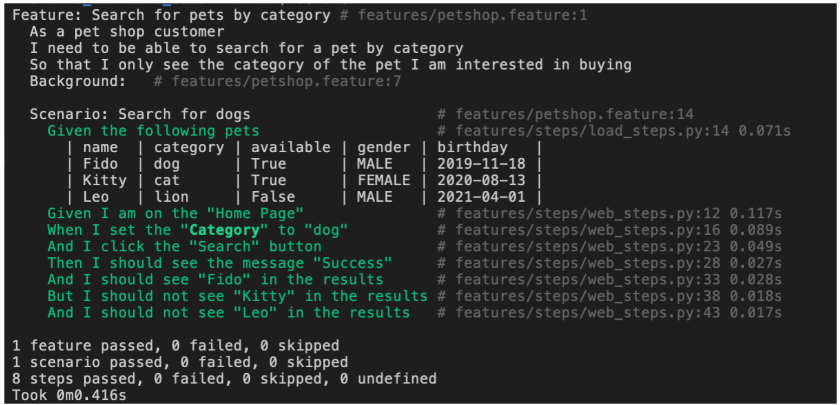

Notice that the word `Category` is highlighted to indicate that it was substituted using variable substitution while `dog` is not.

Next, we will do the same with the string `"dog"`.

# Step 2: Parameterize the text string

In the previous step, you parameterized the element name. Next, it's time to parameterize the element value. This will make the behave step compatible with any element and any value.

Your code should now look like this:
```
@when('I set the "{element_name}" to "dog"')
def step_impl(context, element_name):
    element_id = "pet_" + element_name.lower().replace(' ', '_')
    element = context.driver.find_element(By.ID, element_id)
    element.clear()
    element.send_keys('dog')
```
Follow the same steps with the hard-coded string **"dog"** so that this step will match any string that is required.

## Your Task

Modify the existing step definition as follows:

**Change the word `dog` to a substitution variable called `text_string`.** 
**Keep the quotes `""` as delimiters and don't forget to use the curly braces `{}` around the variable name.**
```
    @when('I set the "{element_name}" to "{...place variable name here...}"')
```
**Pass the newly created `text_string` variable as a parameter to the step implementation.**
```
    def step_impl(context, element_name, ...place_variable_name_here...):
```
**Modify the last line of the step to use the new variable called `text_string` as the data to send instead of the hard-coded string `"dog"`.**
```
        element.send_keys(...place_variable_name_here...)
```
**Save your work.**

## Solution

```
@when('I set the "{element_name}" to "{text_string}"')
def step_impl(context, element_name, text_string):
    element_id = "pet_" + element_name.lower().replace(' ', '_')
    element = context.driver.find_element(By.ID, element_id)
    element.clear()
    element.send_keys(text_string)
```

## Results

Run `behave`.

You should see all the statements in the scenario are still green and passing.

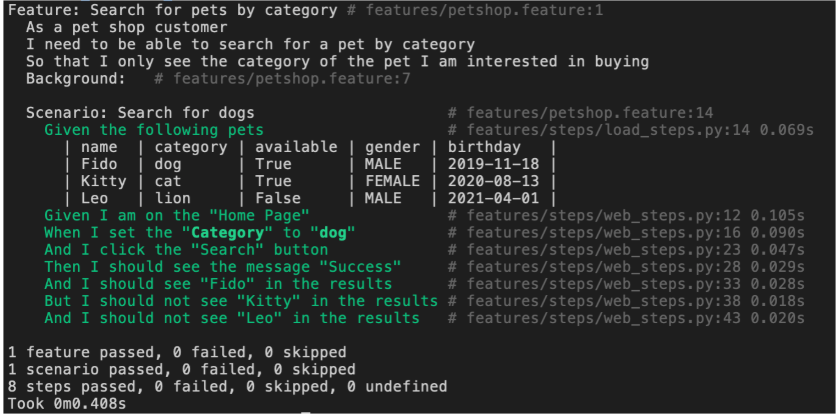

Notice that both the words `Category` and `dog` are now highlighted to indicate that both have been substituted using variable substitution.

Next, you will do the same with button clicks.

# Step 3: Parameterize the button clicks

The next step that you will parameterize is `@when('I click the "Search" button')`. 

If you look in the `web_steps.py` file, you will see that it currently looks like this:

```
@when('I click the "Search" button')
def step_impl(context):
    element = context.driver.find_element(By.ID, 'search-btn')
    element.click()
```

Notice that the button name `search-btn` is hard-coded in the first line of the step definition. You can use variable substitution to make this step match any button click. To do this, you will add a new line of code before the existing first one that calculates the button name.

## Background

Here is some important background information that will help you implement the solution:

The website under test uses the following naming convention for creating the `id=` attribute on buttons. 

It uses the lowercase text from the button, with the suffix `-btn`. 

For example, the Search button has an `id` of `search-btn`.

Use this information to help you implement the step.

## Your Task

Modify the existing step definition as follows:

**Change the word **Search** to a substitution variable called `button`.** 
**Keep the quotes `""` as delimiters and don't forget to use the curly braces `{}` around the variable name.**
```
    @when('I click the "{...place variable name here...}" button')
```
**Pass the newly created `button` variable as a parameter to the step implementation.**
```
    def step_impl(context, ...place_variable_name_here...):
```
**Add a new first line of code to the step that calculates a new variable called `button_id`, lowercasing the button parameter and appending the string `-btn` to the end.**
```
    ...new_variable_here... = button.lower() + '-btn'
```
**Modify the now second line of the step to use the new variable called `button_id` as the element to look for instead of the hard-coded `'search-btn'` string.**
```
    element = context.driver.find_element(By.ID, ...calculated_id_here...)
```
**Save your work.**

## Solution

```
@when('I click the "{button}" button')
def step_impl(context, button):
    button_id = button.lower() + '-btn'
    element = context.driver.find_element(By.ID, button_id)
    element.click()
```

## Results

Run `behave`.

You should see all the statements in the scenario are still green and passing.

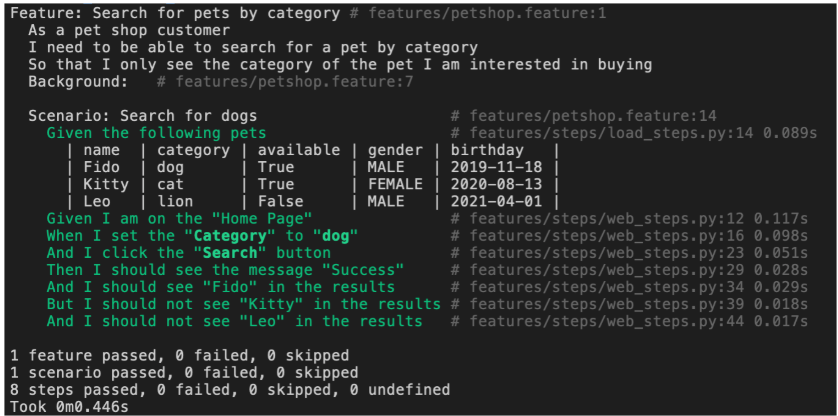

Notice that the word **`Search`** is now highlighted to indicate that it has been substituted using variable substitution.

Next, you will do the same with the messages that you see.

# Step 4: Parameterize the messages

The next step to parameterize using variable substitution is `@then('I should see the message "Success"')`. 

If you look in the `web_steps.py` file, you will see that it currently looks like this:
```
@then('I should see the message "Success"')
def step_impl(context):
    element = context.driver.find_element(By.ID, 'flash_message')
    assert "Success" in element.text
```
In this step, you will parameterize the text that is matched so that you can look for any text message in the `flash_message`.

## Your Task

Modify the existing step definition as follows:

**Change the word `Success` to a substitution variable called `message`.** 
**Keep the quotes `""` as delimiters and don't forget to use the curly braces `{}` around the variable name.**
```
    @then('I should see the message "{...place variable name here...}"')
```
**Pass the newly created `message` variable as a parameter to the step implementation.**
```
    def step_impl(context, ...place_variable_name_here...):
```
**Modify the last line of the step to use the new variable called `message` as the text to look for instead of the hard-coded string `"Success"`.**
```
    assert ...place_variable_name_here... in element.text
```
**Save your work.**

## Solution

```
@then('I should see the message "{message}"')
def step_impl(context, message):
    element = context.driver.find_element(By.ID, 'flash_message')
    assert message in element.text
```

## Results

Run `behave`.

You should see all the statements in the scenario are still green and passing.

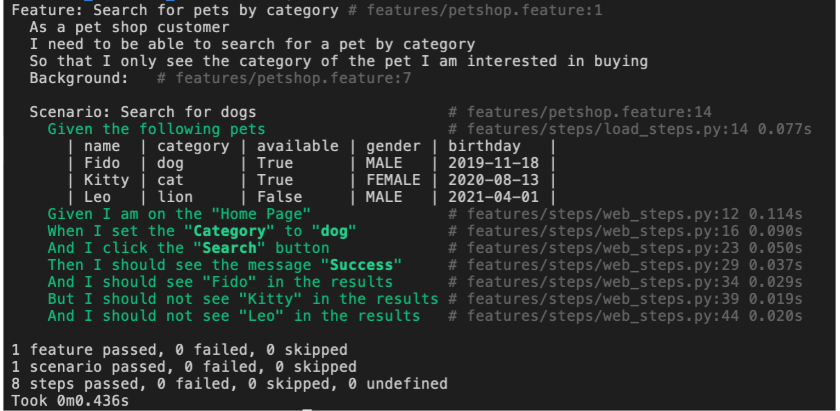

Notice that the word `Success` is now highlighted to indicate that it has been substituted using variable substitution.

Next, you will do the same with what you should see in the search results.

# Step 5: Parameterize what to see in the results

The next step to parameterize using variable substitution is `@then('I should see "Fido" in the results')`. 

If you look in the `web_steps.py` file, you will see that it currently looks like this:
```
@then('I should see "Fido" in the results')
def step_impl(context):
    element = context.driver.find_element(By.ID, 'search_results')
    assert "Fido" in element.text
```
In this step, you will parameterize the text that is matched so that you can look for any text in the `search_results`.

## Your Task

Modify the existing step definition as follows:

**Change the word `Fido` to a substitution variable called `search_text`.**
**Keep the quotes `""` as delimiters and don't forget to use the curly braces `{}` around the variable name.**
```
    @then('I should see "{...place variable name here...}" in the results')
```
**Pass the newly created `search_text` variable as a parameter to the step implementation.**
```
    def step_impl(context, ...place_variable_name_here...):
```
**Modify the last line of the step to use the new variable called `search_text` as the text to look for instead of the hard-coded string `"Fido"`.**
```
    assert ...place_variable_name_here... in element.text
```
**Save your work.**

## Solution

```
@then('I should see "{search_text}" in the results')
def step_impl(context, search_text):
    element = context.driver.find_element(By.ID, 'search_results')
    assert search_text in element.text
```

## Results

Run `behave`.

You should see all the statements in the scenario are still green and passing.

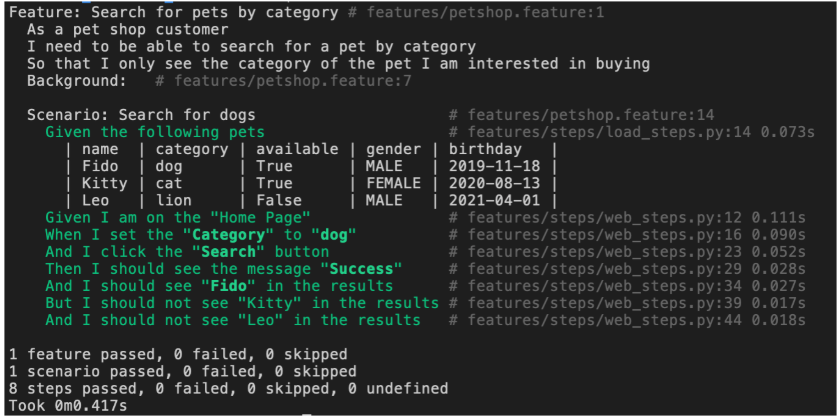

Notice that the word `Fido` is now highlighted to indicate that it has been substituted using variable substitution.

Next, you will do the same with what you should not see in the search results.

# Step 6: Parameterize what to not see in the results

The next step to parameterize using variable substitution is `@then('I should not see "Kitty" in the results')`. 

If you look in the `web_steps.py` file, you will see that it currently looks like this:
```
@then('I should not see "Kitty" in the results')
def step_impl(context):
    element = context.driver.find_element(By.ID, 'search_results')
    assert "Kitty" not in element.text
```

In this step, you will parameterize the text that is matched so that you can look for any text in the `search_results` and `assert` that it is not there.

## Your Task

Modify the existing step definition as follows:

**Change the word Kitty to a substitution variable called `search_text`.** 
**Keep the quotes `""` as delimiters and don't forget to use the curly braces `{}` around the variable name.**
```
    @then('I should not see "{...place variable name here...}" in the results')
```
**Pass the newly created `search_text` variable as a parameter to the step implementation.**
```
    def step_impl(context, ...place_variable_name_here...):
```
**Modify the last line of the step to use the new variable called `search_text` as the text to look for instead of the hard-coded string `"Kitty"`.**
```
    assert ...place_variable_name_here... not in element.text
```
**Save your work.**

## Solution

```
@then('I should not see "{search_text}" in the results')
def step_impl(context, search_text):
    element = context.driver.find_element(By.ID, 'search_results')
    assert search_text not in element.text
```

## Results

Run behave.

You should see the following error:

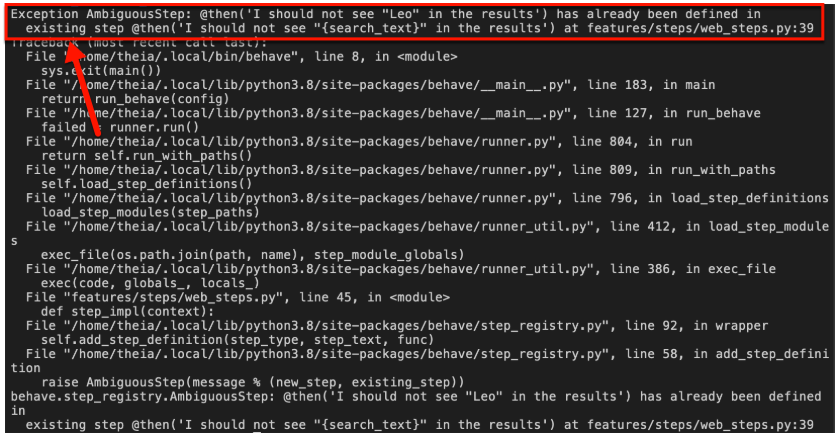

What behave is telling you is that the step you just created also matches the next step of `@then('I should not see "Leo" in the results')`, so it is already defined.

Next, you will fix that error.

# Step 7: Remove unneeded step

The final edit to the `web_steps.py` file is to remove the step which is now a duplicate because you parameterized the previous step to match the same statement.

If you look in the `web_steps.py` file, you will see that it currently looks like this:
```
@then('I should not see "Leo" in the results')
def step_impl(context):
    element = context.driver.find_element(By.ID, 'search_results')
    assert "Leo" not in element.text
```
This step will be matched by the previous parameterized step so it is no longer needed.

## Your Task

Delete the code that is now redundant due to parameterization:

**Delete the step implementation for `@then('I should not see "Leo" in the results')`**.
```
@then('I should not see "Leo" in the results')
def step_impl(context):
    element = context.driver.find_element(By.ID, 'search_results')
    assert "Leo" not in element.text
```
**Save your work.**

## Solution (`web_steps.py`)

```
@given('I am on the "Home Page"')
def step_impl(context):
    context.response = context.driver.get(context.base_url)

@when('I set the "{element_name}" to "{text_string}"')
def step_impl(context, element_name, text_string):
    element_id = "pet_" + element_name.lower().replace(' ', '_')
    element = context.driver.find_element(By.ID, element_id)
    element.clear()
    element.send_keys(text_string)

@when('I click the "{button}" button')
def step_impl(context, button):
    button_id = button.lower() + '-btn'
    element = context.driver.find_element(By.ID, button_id)
    element.click()

@then('I should see the message "{message}"')
def step_impl(context, message):
    element = context.driver.find_element(By.ID, 'flash_message')
    assert message in element.text

@then('I should see "{search_text}" in the results')
def step_impl(context, search_text):
    element = context.driver.find_element(By.ID, 'search_results')
    assert search_text in element.text

@then('I should not see "{search_text}" in the results')
def step_impl(context, search_text):
    element = context.driver.find_element(By.ID, 'search_results')
    assert search_text not in element.text
```

## Results

Run `behave`.

You should see all the statements in the scenario are now green again and passing.

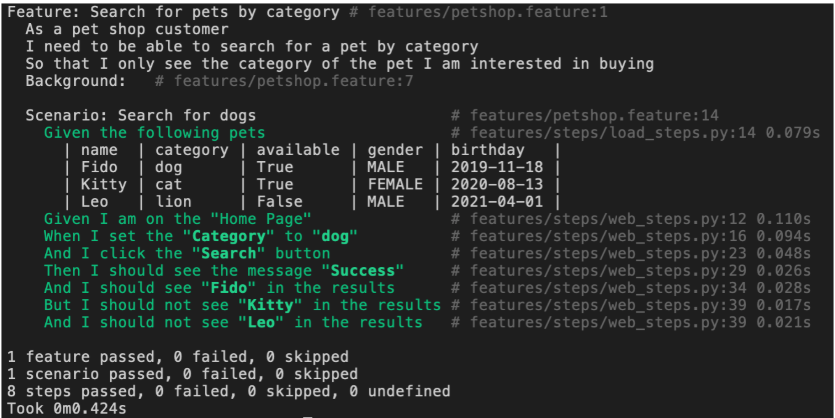

Notice that both the words `Kitty` and `Leo` are now highlighted to indicate that they've been substituted using variable substitution.

Next, we will add a new scenario to test our parameterized steps.

# Step 8: Add a new scenario

Now that you have made your step definitions more generic, you can add new feature scenarios without needing to add more steps. In this final exercise, you will add a new scenario to create a pet without having to implement any additional steps.

Open the `features/petshop.feature` file in the IDE editor. 

You will add a new scenario in this file.

## Your Task

Your task is simply to cut and paste a new scenario, run `behave`, and watch the scenario pass.

**Copy this scenario to the clipboard, paste it into the `petshop.feature` file, and save it:**
```
Scenario: Create a Pet
    Given I am on the "Home Page"
    When I set the "Name" to "Happy"
    And I set the "Category" to "Hippo"
    And I set the "Birthday" to "2022-06-16"
    And I click the "Create" button
    Then I should see the message "Success"
    When I click the "Clear" button
    And I click the "Search" button
    Then I should see the message "Success"
    And I should see "Happy" in the results
```

## Solution (`petshop.feature`)

```
Feature: Search for pets by category

As a pet shop customer
I need to be able to search for a pet by category
So that I only see the category of the pet I am interested in buying

Background:
    Given the following pets
        | name       | category | available | gender  | birthday   |
        | Fido       | dog      | True      | MALE    | 2019-11-18 |
        | Kitty      | cat      | True      | FEMALE  | 2020-08-13 |
        | Leo        | lion     | False     | MALE    | 2021-04-01 |

Scenario: Search for dogs
    Given I am on the "Home Page"
    When I set the "Category" to "dog"
    And I click the "Search" button
    Then I should see the message "Success"
    And I should see "Fido" in the results
    But I should not see "Kitty" in the results
    And I should not see "Leo" in the results

Scenario: Create a Pet
    Given I am on the "Home Page"
    When I set the "Name" to "Happy"
    And I set the "Category" to "Hippo"
    And I set the "Birthday" to "2022-06-16"
    And I click the "Create" button
    Then I should see the message "Success"
    When I click the "Clear" button
    And I click the "Search" button
    Then I should see the message "Success"
    And I should see "Happy" in the results
```

## Results

Run `behave`.

You should see all of the statements in the previous scenario to search for a pet, and the new scenario to create a pet are green and passing.

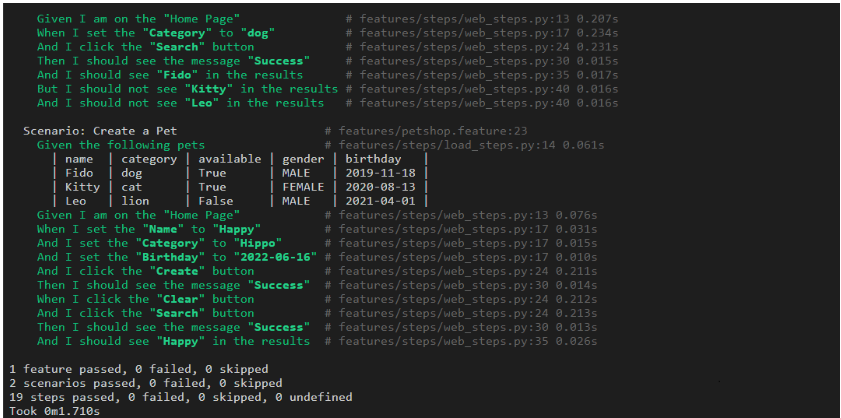

Notice that you didn't have to write any more steps. 

Once you parameterize a set of steps to manipulate web pages, you can reuse them over and over in any number of scenarios.

# Conclusion

Congratulations! You just completed the **Using Variable Substitution** lab. You now have the skills to implement the steps that are parameterized and reusable across many web pages and applications.

Your next challenge is to apply these techniques in your projects to create a `.feature` file that describes the behavior of your application and then generates the initial steps with `behave`. You can then implement those steps using variable substitution to make them pass following true Behavior Driven Development practices.